# <center>Day 12</center>

## 📝 Practice Questions

In [1]:
"""
    1.	What does the Central Limit Theorem state in simple words?
    -> CLT state that if you take many random samples from populations and plot their mean, it will form a normal distribution.

    2.	Why is CLT important in inferential statistics?
    -> Allows us to use normal distribution mmethods to make inference about population parameters

    3.	What happens to the sampling distribution when sample size increases?
    -> More sample size, the more sample distribution becomes normal distribution

    4.	Why is sample size ≥ 30 often recommended?
    -> Because it usually ensures the sample distribution is apporx normal

    5.	When do we use the Chi-Square Test?
    -> The Chi-Square test is used to analyze relationships or differences between categorical variables.

    6.	Difference between:
        - Goodness of Fit test
        - Test of Independence
    -> Goodness of Fit tests one categorical variable against a theoretical distribution, while Independence tests the relationship between two categorical variables.

    7.	How are degrees of freedom calculated in:
        - Goodness of Fit
        - Independence test?
    -> For Goodness of Fit, df = k − 1, and for Independence, df = (r − 1)(c − 1).

    8.	Why is Chi-Square always right-tailed?
    -> Chi-Square is right-tailed because the statistic is based on squared values and cannot be negative.
"""

'\n    1.\tWhat does the Central Limit Theorem state in simple words?\n    ->\n\n    2.\tWhy is CLT important in inferential statistics?\n    ->\n\n    3.\tWhat happens to the sampling distribution when sample size increases?\n    ->\n\n    4.\tWhy is sample size ≥ 30 often recommended?\n    ->\n\n    5.\tWhen do we use the Chi-Square Test?\n    ->\n\n    6.\tDifference between:\n        - Goodness of Fit test\n        - Test of Independence\n    ->\n\n    7.\tHow are degrees of freedom calculated in:\n        - Goodness of Fit\n        - Independence test?\n    ->\n\n    8.\tWhy is Chi-Square always right-tailed?\n    ->\n'

## 📌 Mini Assignment

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats



**Question 1: Central Limit Theorem (CLT)**

📘 Scenario

An e-commerce company has highly skewed order values.

You are given:
	•	Population mean = ₹2000
	•	Population standard deviation = ₹800

You take a sample of size n = 40.

SE: 126.49110640673517



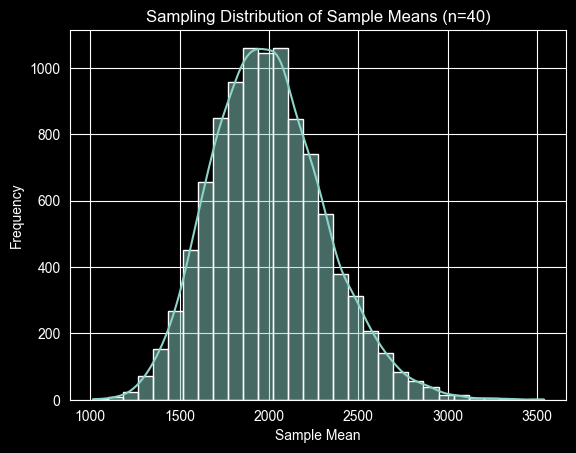

In [6]:
np.random.seed(9009)

mu = 2000
sigma = 800
n = 40

SE = sigma/ np.sqrt(n)

e_commerce = np.random.exponential(scale=mu,size=100000)

sample_means = []

for _ in range(10000):
    sample = np.random.choice(e_commerce,size=n)
    sample_means.append(np.mean(sample))

print(f'SE: {SE}')
print()
sns.histplot(sample_means, bins=30, kde=True)
plt.title("Sampling Distribution of Sample Means (n=40)")
plt.xlabel("Sample Mean")
plt.ylabel("Frequency")
plt.show()

**Question 2: Chi-Square Test (Goodness of Fit)**

📘 Scenario

A telecom company claims that customer complaints are distributed as:
| Category | Expected % |
|----------|------------|
| Network  |     50%    |
| Billing  |     30%    |
| Service  |     20%    |

From 300 complaints, observed counts are:
| Category |  Observed  |
|----------|------------|
| Network  |     120    |
| Billing  |     110    |
| Service  |      70    |

Test the claim at α = 0.05.


In [12]:
H0 = '''
Network = 50%,
Billing = 30%,
Service = 20%'''

H1 = '''
Network != 50%,
Billing != 30%,
Service != 20%'''

total = 300
alpha = 0.05

observed = np.array([120, 110, 70])
expected_per = np.array([0.50, 0.30, 0.20])
expected = np.array([expected_per * total])

k = len(observed)

chi_square = ((observed-expected)**2 / expected).sum()

df = k -1

p_value = 1 - stats.chi2.cdf(chi_square, df)
critical_value = stats.chi2.ppf(1 - alpha, df)

if chi_square > critical_value:
    decision = "Reject H0"
else:
    decision = "Fail to Reject H0"

print("Observed:", observed)
print("Expected:", expected)
print("\nChi-Square Statistic:", chi_square)
print("Degrees of Freedom:", df)
print("p-value:", p_value)
print("Critical Value:", critical_value)
print("Decision:", decision)


Observed: [120 110  70]
Expected: [[150.  90.  60.]]

Chi-Square Statistic: 12.11111111111111
Degrees of Freedom: 2
p-value: 0.002344799092590777
Critical Value: 5.991464547107979
Decision: Reject H0


**Question 3: Chi-Square Test of Independence**

📘 Scenario

A survey checks if Device Type affects Subscription Plan.

|            |  Basic  |  Premium  |
|------------|---------|-----------|
|  Android   |    80   |     40    |
|     iOS    |    60   |     70    |

Test whether subscription plan depends on device type at α = 0.05.



In [15]:
data = np.array([[80,40],
                 [60,70]])

chi2, p, dof, expected = stats.chi2_contingency(data)


print("Chi-square statistic:", chi2)
print("P-value:", p)
print("Degrees of freedom:", dof)
print("Expected frequencies:\n", expected)

if p  < 0.05:
    decision = "Reject H0 (Variables are related)"
else:
    decision = "Fail to Reject H0 (Variables are independent)"

print("Decision:", decision)

Chi-square statistic: 9.839769605394602
P-value: 0.0017077888624378302
Degrees of freedom: 1
Expected frequencies:
 [[67.2 52.8]
 [72.8 57.2]]
Decision: Reject H0 (Variables are related)
